# Scikit-learn programming workflow

In [1]:
import numpy as np
import pandas as pd 
import sklearn

In [2]:
from sklearn.datasets import load_breast_cancer
cancer_data = load_breast_cancer()

In [3]:
print(cancer_data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [4]:
cancer_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
cancer_data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [6]:
cancer_data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [7]:
cancer_data.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [8]:
df = pd.DataFrame(cancer_data.data,columns=cancer_data.feature_names)

In [9]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [10]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [11]:
df['target'] = cancer_data.target

In [12]:
df['target'].value_counts()

target
1    357
0    212
Name: count, dtype: int64

In [13]:
cancer_data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [14]:
df.head(20)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678,0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440,0
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368,0
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510,0
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720,0
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750,0


# Linear and Logistic regression


In [16]:
import numpy as np
import pandas as pd
import sklearn

In [21]:
from sklearn.datasets import fetch_california_housing
california_housing = fetch_california_housing()
print("Data shape: {}".format(california_housing.data.shape))

Data shape: (20640, 8)


In [22]:
california_housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [25]:
df= pd.DataFrame(california_housing.data,columns = california_housing.feature_names)

In [24]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [26]:
import pandas as pd

# Load the CSV file
file_path = 'C:/Users/anits-csm/Downloads/archive (7)/user_behavior_dataset.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the data
data.head()


,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


# Linear Regression

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
data = pd.read_csv('C:/Users/anits-csm/Downloads/archive (7)/user_behavior_dataset.csv')

# Drop 'User ID' as it doesn't provide useful information
data = data.drop('User ID', axis=1)

# One-hot encoding for categorical features
categorical_columns = ['Device Model', 'Operating System', 'Gender']
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Define feature columns and target column
X = data.drop('User Behavior Class', axis=1)
y = data['User Behavior Class']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions
y_pred = linear_model.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 0.031399971469789026
R-squared: 0.9827800939897072


# Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load dataset
data = pd.read_csv('C:/Users/anits-csm/Downloads/archive (7)/user_behavior_dataset.csv')

# Drop 'User ID'
data = data.drop('User ID', axis=1)

# One-hot encoding for categorical features
categorical_columns = ['Device Model', 'Operating System', 'Gender']
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Define feature columns and target column
X = data.drop('User Behavior Class', axis=1)
y = data['User Behavior Class']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
logistic_model = LogisticRegression(max_iter=2000)
logistic_model.fit(X_train, y_train)

# Make predictions
y_pred_log = logistic_model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred_log)
conf_matrix = confusion_matrix(y_test, y_pred_log)
class_report = classification_report(y_test, y_pred_log)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n {conf_matrix}')
print(f'Classification Report:\n {class_report}')


Accuracy: 0.7642857142857142
Confusion Matrix:
 [[24  3  0  0  0]
 [ 1 24  3  1  0]
 [ 0  8 19  7  0]
 [ 0  0  8 18  1]
 [ 0  0  0  1 22]]
Classification Report:
               precision    recall  f1-score   support

           1       0.96      0.89      0.92        27
           2       0.69      0.83      0.75        29
           3       0.63      0.56      0.59        34
           4       0.67      0.67      0.67        27
           5       0.96      0.96      0.96        23

    accuracy                           0.76       140
   macro avg       0.78      0.78      0.78       140
weighted avg       0.77      0.76      0.76       140



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Evaluating models and performance

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")



X_train shape: (120, 4), X_test shape: (30, 4)


In [4]:
print(data.columns)


Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load your dataset
data = pd.read_csv('C:/Users/hp/Downloads/archive (3)/iris.csv')

# Define features (X) and target (y)
X = data.drop('species', axis=1)  # Features are all columns except 'species'
y = data['species']  # Target is the 'species' column

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the shapes of the split sets
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")


X_train shape: (120, 4), X_test shape: (30, 4)
y_train shape: (120,), y_test shape: (30,)


# Cross-validation


In [3]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier  # You can choose other models too
import pandas as pd

# Load your dataset
data = pd.read_csv('C:/Users/hp/Downloads/archive (3)/iris.csv')

# Define features (X) and target (y)
X = data.drop('species', axis=1)  # Features are all columns except 'species'
y = data['species']  # Target is the 'species' column

# Define the model
model = DecisionTreeClassifier(random_state=42)

# Perform cross-validation (5-fold)
scores = cross_val_score(model, X, y, cv=5)

# Print the mean accuracy and individual scores
print(f"Cross-validation scores: {scores}")
print(f"Mean accuracy: {scores.mean()}")


Cross-validation scores: [0.96666667 0.96666667 0.9        0.93333333 1.        ]
Mean accuracy: 0.9533333333333334


# Evalution metrics


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Load your dataset
data = pd.read_csv('C:/Users/hp/Downloads/archive (3)/iris.csv')

# Define features (X) and target (y)
X = data.drop('species', axis=1)  # Features are all columns except 'species'
y = data['species']  # Target is the 'species' column

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # 'weighted' for multi-class
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

# Print evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n{conf_matrix}")


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


# Learning curves



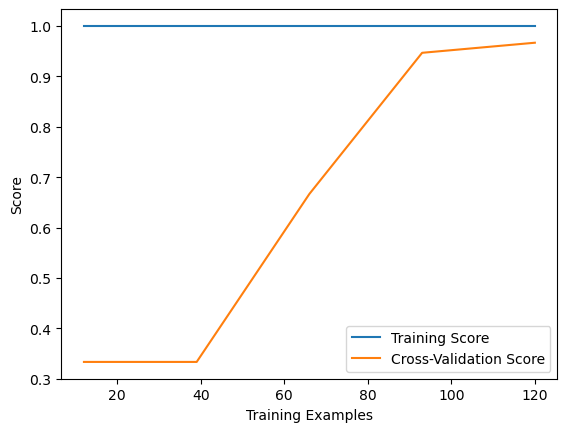

In [7]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5)
train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

plt.plot(train_sizes, train_mean, label="Training Score")
plt.plot(train_sizes, test_mean, label="Cross-Validation Score")
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.legend()
plt.show()


# ROC Curve and AUC (For Binary Classification)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


X_train shape: (120, 4), X_test shape: (30, 4)
y_train shape: (120, 3), y_test shape: (30, 3)
Type of y_pred_proba: <class 'list'>
Shape of y_pred_proba after stacking: (90, 2)
Shape of y_test: (30, 3)
Mismatch in number of samples: y_test has 30, y_pred_proba has 90
Mismatch in number of samples: y_test has 30, y_pred_proba has 90
Mismatch in number of samples: y_test has 30, y_pred_proba has 90


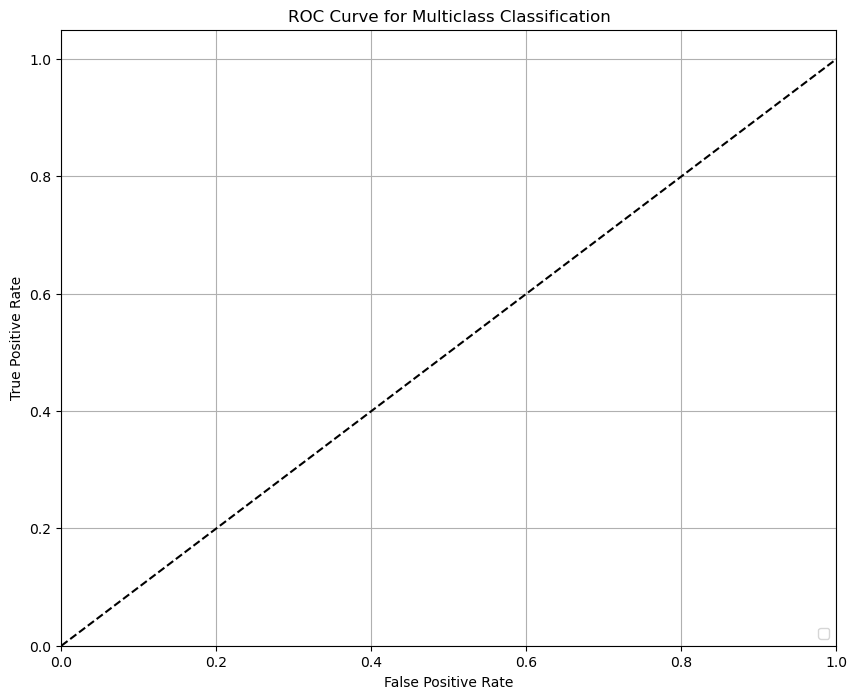

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

# Load your dataset
data = pd.read_csv('C:/Users/hp/Downloads/archive (3)/iris.csv')

# Define features (X) and target (y)
X = data.drop('species', axis=1)  # Features
y = data['species']  # Target

# Binarize the output for multiclass ROC
classes = list(data['species'].unique())
y_bin = label_binarize(y, classes=classes)  # Convert to binary format
n_classes = y_bin.shape[1]  # Number of classes

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=0.2, random_state=42)

# Debugging outputs to check the shapes
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")

# Define and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Get predicted probabilities
y_pred_proba = model.predict_proba(X_test)

# Check the type and shape of predicted probabilities
print(f"Type of y_pred_proba: {type(y_pred_proba)}")
if isinstance(y_pred_proba, list):
    y_pred_proba = np.vstack(y_pred_proba)  # Stack arrays in sequence vertically (row-wise)
    print(f"Shape of y_pred_proba after stacking: {y_pred_proba.shape}")
else:
    print(f"Shape of y_pred_proba: {y_pred_proba.shape}")

# Ensure that y_pred_proba matches the number of samples in y_test
print(f"Shape of y_test: {y_test.shape}")

# Create a figure for the ROC curve
plt.figure(figsize=(10, 8))

# Compute ROC curve and AUC for each class
for i in range(n_classes):
    # Check if y_test and y_pred_proba have the same number of samples
    if y_test.shape[0] == y_pred_proba.shape[0]:
        fpr, tpr, _ = roc_curve(y_test[:, i], y_pred_proba[:, i])  # Proper indexing
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'ROC curve of class {classes[i]} (AUC = {roc_auc:.2f})')  # Add label here
    else:
        print(f"Mismatch in number of samples: y_test has {y_test.shape[0]}, y_pred_proba has {y_pred_proba.shape[0]}")

# Plot settings
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multiclass Classification')
plt.legend(loc="lower right")  # This line creates the legend
plt.grid()
plt.show()

